In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import quad
import random
from astropy.io import fits
import scipy.stats as st
import math
from scipy.optimize import curve_fit, leastsq

Read in the file that includes for different sources, the velue of their flux upperlimit.

In [4]:
ulfile="UL_3.txt"
df=pd.read_csv(ulfile,sep=",",header=[0])
df

,Photon flux,60% UL,68% UL,75% UL,80% UL,90% UL,95% UL
0,12.537434,13.259930,14.155334,15.050739,15.050739,16.841547,18.632356
1,6.519432,7.324373,8.150567,8.150567,8.976761,9.802956,11.455344
2,2.216184,2.498909,3.270853,4.042796,4.042796,5.586684,6.358627
3,0.001022,0.059490,0.059490,0.178470,0.297450,0.773370,1.249291
4,0.060424,0.415750,0.970083,1.247249,1.524416,2.633082,3.464581
5,2.296865,2.798862,3.234226,3.234226,3.669590,4.540318,4.975682
6,0.582152,0.795056,1.216296,1.637536,2.058775,2.480015,3.322495


I defined a pdf function that based on the physical theory behind the data, could be a probable function to fit the data

In [3]:
y=[0.6,0.68,0.75,0.80,0.9,0.95]

def cdf(x, a, b):
    ans=[0.5*pow(np.pi/b,0.5)*a * math.erf(pow(b,0.5) * xi) for xi in x]
    return ans

def pdf(x, a,b):
    return (a * np.exp(-b* pow(x,2)))
    

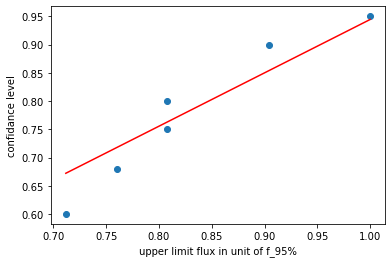

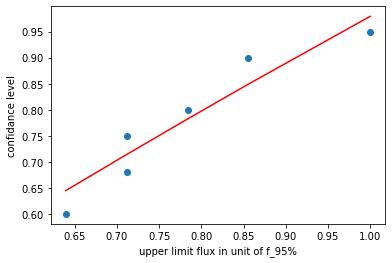

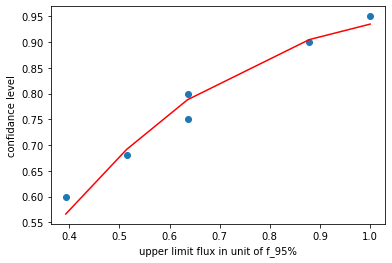

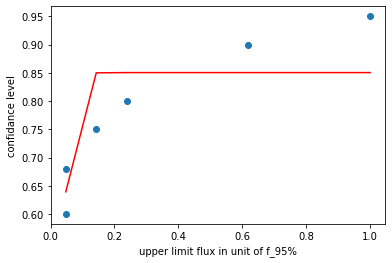

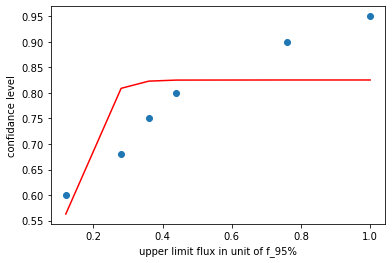

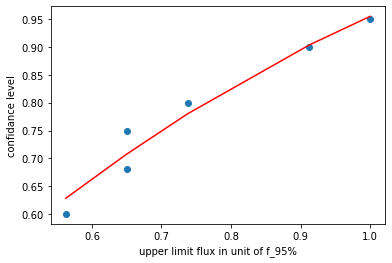

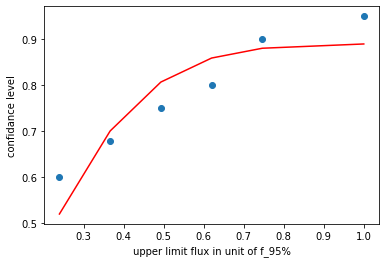

In [4]:
for index,row in df.iterrows():
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(cdf, x, y)
    #print(param,param_cov)
    y2 = cdf(x,param[0],param[1])
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95%")
    plt.show()


Now for the data rows which shows a good fit, check if the value of pdf is what it expected using the best fit with cdf.

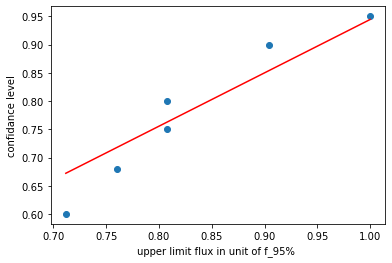

cdf for 1th flux is: 0.72 which should be 0.68


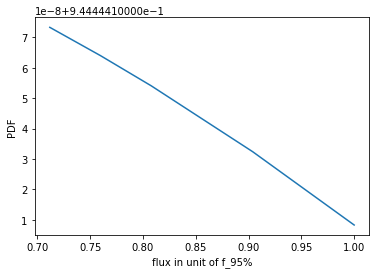

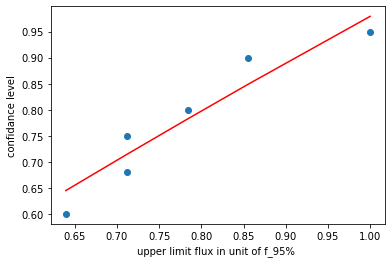

cdf for 2th flux is: 0.71 which should be 0.75


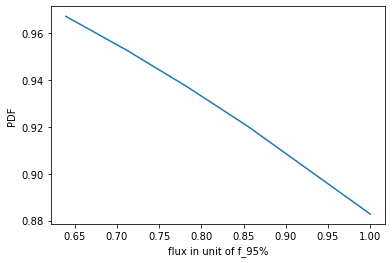

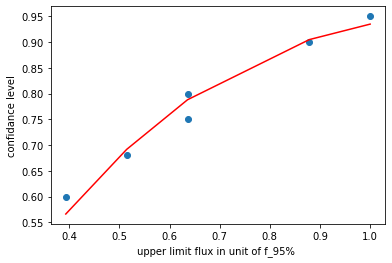

cdf for 3th flux is: 0.79 which should be 0.8


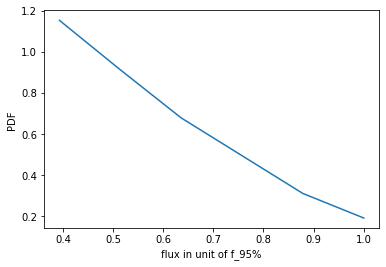

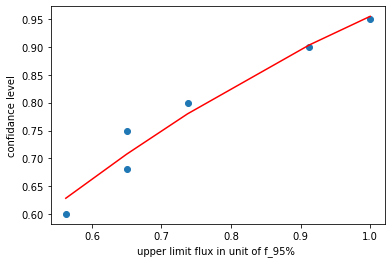

cdf for 4th flux is: 0.9 which should be 0.9


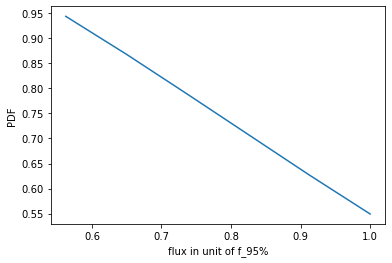

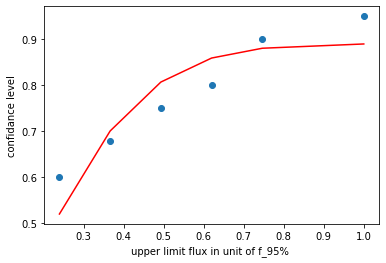

cdf for 5th flux is: 0.89 which should be 0.95


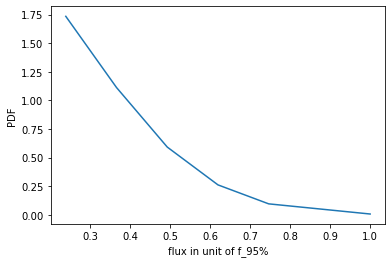

In [5]:
fitIndex=[0,1,2,5,6] #good fit index
i=0
parmlist=[]
for index in fitIndex:
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(cdf, x, y)
    parmlist.append(param)
    #print(param,param_cov)
    y2 = cdf(x,param[0],param[1])
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95% ") #(cts/s/cm^2)
    plt.show()
    print("cdf for {}th flux is: {} which should be {}".format(i,round(quad(pdf, 0, x[i], args=(param[0],param[1]))[0],2),y[i]))
    
    plt.plot(x,pdf(np.array(x),param[0],param[1]))
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()


check if the average fiting parameters could be a good option to fit all data rows?

In [36]:
aAve=0
for i in range(len(fitIndex)):
    aAve+=parmlist[i][0]
    
aAve=aAve/len(fitIndex) 

bAve=0
for i in range(len(fitIndex)):
    bAve+=parmlist[i][1]
    
bAve=bAve/len(fitIndex)

aAve,bAve

(1.4405097460738858, 1.7707692063667664)

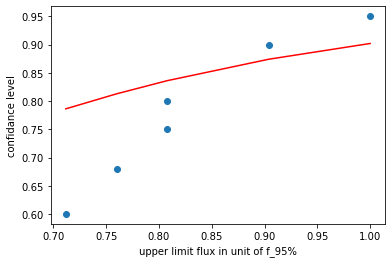

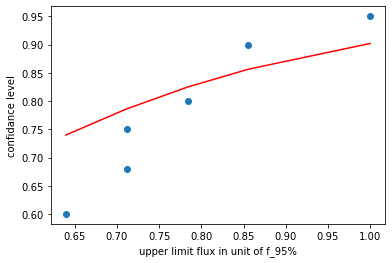

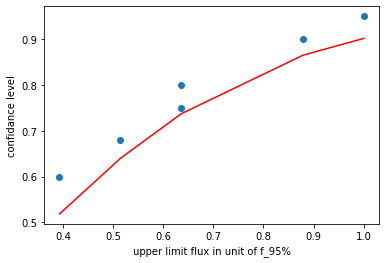

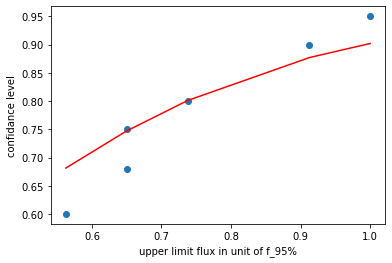

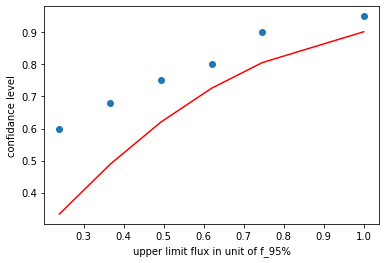

In [44]:
allindex=np.arange(0,df.shape[0])
for index in fitIndex:
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    y2 = cdf(x,aAve,bAve)
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95%")
    plt.show()


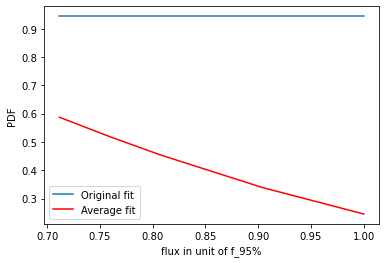

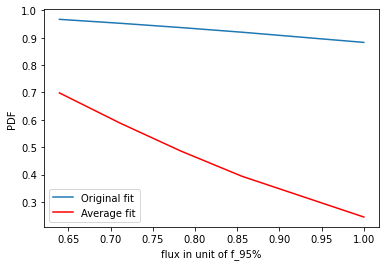

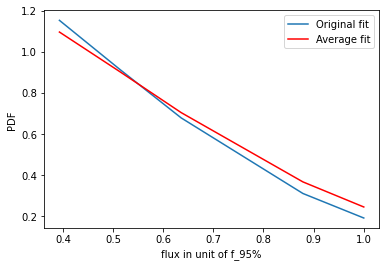

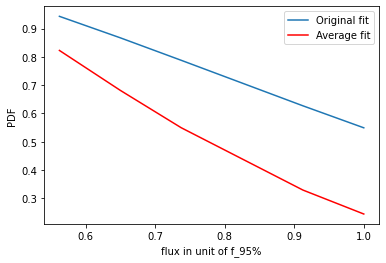

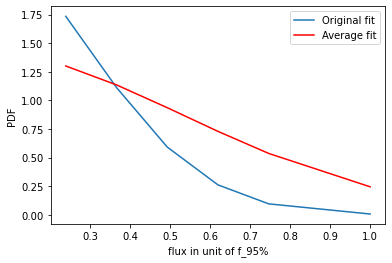

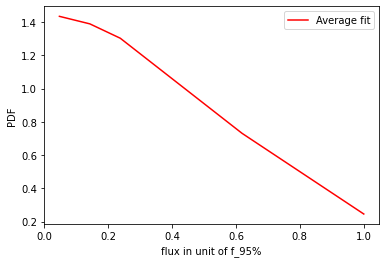

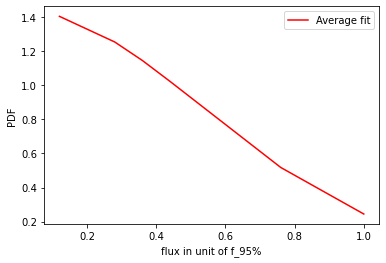

In [54]:
i=0
for index in fitIndex:
    param=parmlist[i]
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    plt.plot(x,pdf(np.array(x),param[0],param[1]),label="Original fit")
    plt.plot(x,pdf(np.array(x),aAve,bAve),label="Average fit",c="r")
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()
    
for index in [3,4]:
    #param=parmlist[i]
    x=df.loc[index].values[1:]
    x/=x[-1]
    #plt.plot(x,pdf(np.array(x),param[0],param[1]),label="Original fit")
    plt.plot(x,pdf(np.array(x),aAve,bAve),label="Average fit",c="r")
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()

No it wasn't a good option to use the average fit parameters.

Now lets see if a plonomiyal would be a good fit?! and check all we did before.


In [121]:
######Try polynomial fit
y=[0.6,0.68,0.75,0.80,0.9,0.95]

def Polycdf(x, a, b, c):
    return a*pow(x,4)/4.+b*pow(x,3)/3.+c*pow(x,1)

def Polypdf(x, a, b, c):
    return a*pow(x,3)+b*pow(x,2)+c
    

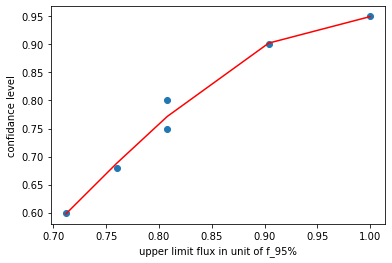

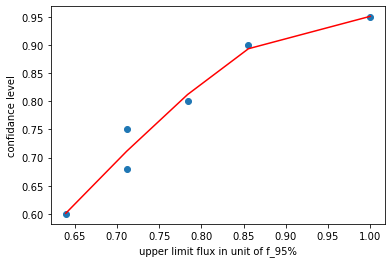

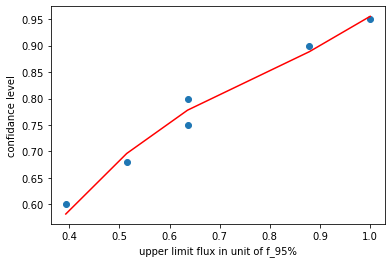

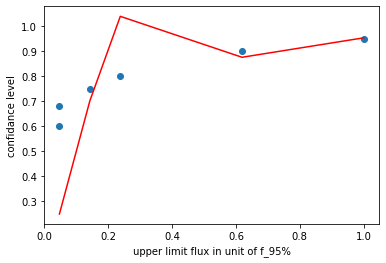

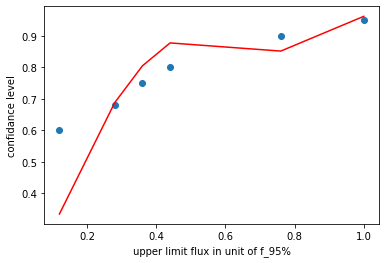

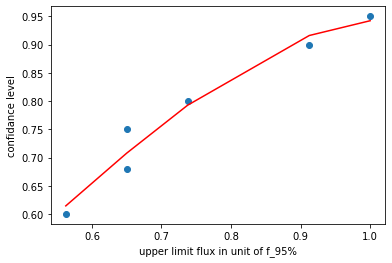

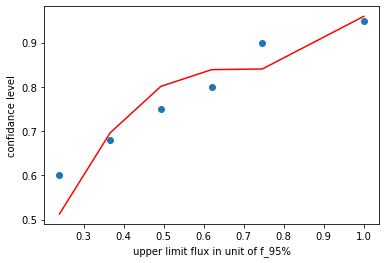

In [123]:
for index,row in df.iterrows():
    x=df.loc[index].values[1:]*pow(10,-7)
    #print(x)
    x/=x[-1]
    #xnew=np.array(list(x)+[0.01,0.1])
    #ynew=np.array(list(y)+[y[0],y[0]])
    param, param_cov = curve_fit(Polycdf, x, y)
    #print(param,param_cov)
    y2 = Polycdf(x,param[0],param[1],param[2])
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95%")
    plt.show()


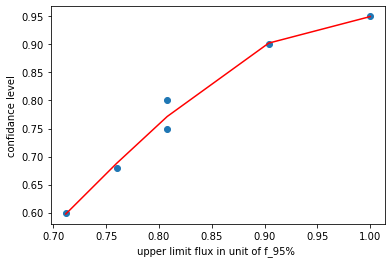

cdf for 1th flux is: -3.36 which should be 0.68


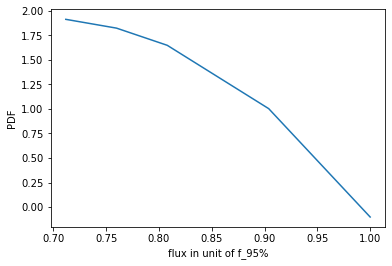

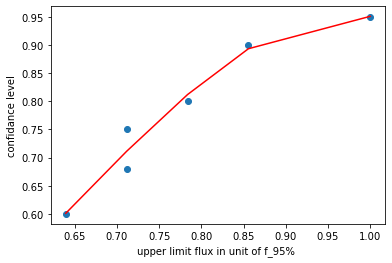

cdf for 2th flux is: -2.89 which should be 0.75


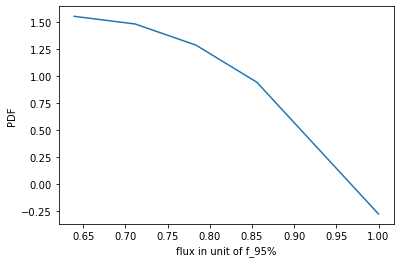

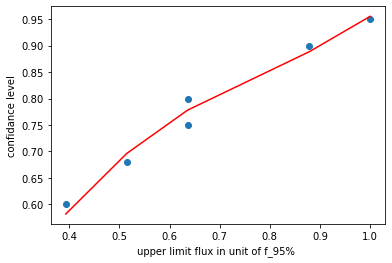

cdf for 3th flux is: 9.62 which should be 0.8


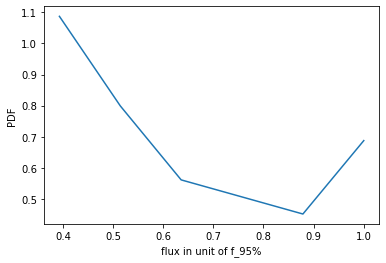

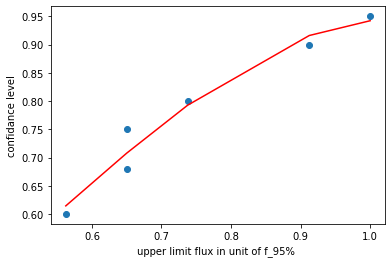

cdf for 4th flux is: -1.59 which should be 0.9


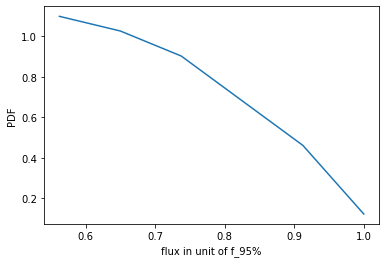

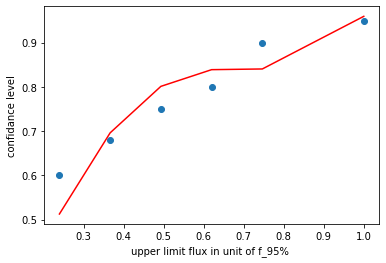

cdf for 5th flux is: 516728.04 which should be 0.95


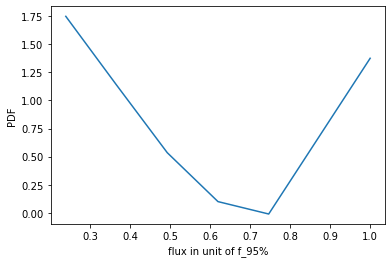

In [74]:
fitIndex=[0,1,2,5,6] #good fit index
i=0
parmlist=[]
for index in fitIndex:
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(Polycdf, x, y)
    parmlist.append(param)
    #print(param,param_cov)
    y2 = Polycdf(x,param[0],param[1],param[2])
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95% ") #(cts/s/cm^2)
    plt.show()
    print("cdf for {}th flux is: {} which should be {}".format(i,round(quad(pdf, 0, x[i], args=(param[0],param[1]))[0],2),y[i]))
    #print(Polypdf(np.array(x),param[0],param[1],param[2]))
    #print(x)
    plt.plot(x,Polypdf(np.array(x),param[0],param[1],param[2]))
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()


In [77]:
PolyaAve=0
for i in range(len(fitIndex)):
    PolyaAve+=parmlist[i][0]
    
PolyaAve=PolyaAve/len(fitIndex) 

PolybAve=0
for i in range(len(fitIndex)):
    PolybAve+=parmlist[i][1]
    
PolybAve=PolybAve/len(fitIndex)

PolycAve=0
for i in range(len(fitIndex)):
    PolycAve+=parmlist[i][2]
    
PolycAve=PolycAve/len(fitIndex)

PolyaAve,PolybAve,PolycAve

(-1.8752919876701906, 1.2248160112079574, 1.0120330039834724)

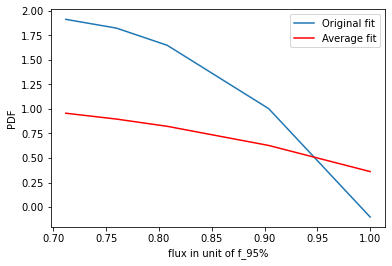

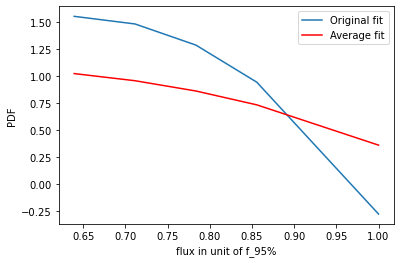

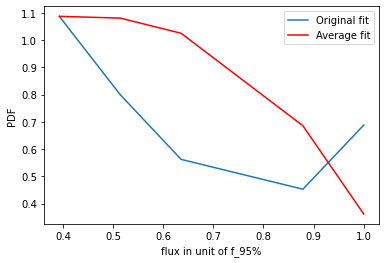

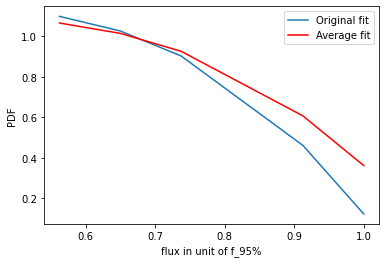

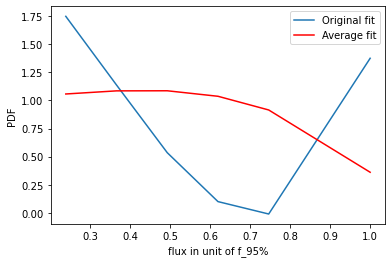

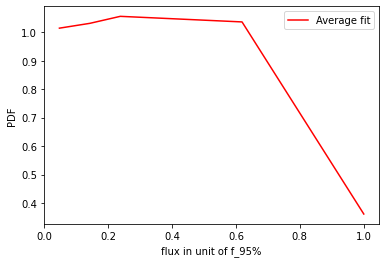

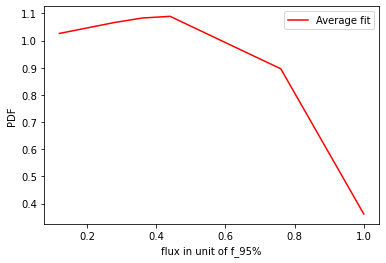

In [78]:
i=0
for index in fitIndex:
    param=parmlist[i]
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    plt.plot(x,Polypdf(np.array(x),param[0],param[1],param[2]),label="Original fit")
    plt.plot(x,Polypdf(np.array(x),PolyaAve,PolybAve,PolycAve),label="Average fit",c="r")
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()
    
for index in [3,4]:
    #param=parmlist[i]
    x=df.loc[index].values[1:]
    x/=x[-1]
    #plt.plot(x,pdf(np.array(x),param[0],param[1]),label="Original fit")
    plt.plot(x,Polypdf(np.array(x),PolyaAve,PolybAve,PolycAve),label="Average fit",c="r")
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()

It wasn't a good trial.

Now lets check a step function as the model.

In [5]:
y=np.array([0.6,0.68,0.75,0.80,0.9,0.95])

def heavcdf(x, a, b,c):
    return ((np.log(a*np.exp(2*b*x)+1)/(2*a*b))+c)

def heavpdf(x, a,b):
    return (1/(a + np.exp(-2*b*x)))
    
def restrict(p, x, y):
    integral = quad(heavpdf, 0, x.any(), args=(p[0], p[1]))[0]
    penalization = abs(y-integral)*10000 #1 means normalized to 1
    return y - heavpdf(x, p[0], p[1]) - penalization

def residuals(p, x, y):
    integral = quad(heavpdf, 0, 1, args=(p[0], p[1]))[0]
    penalization = abs(2.-integral)*10000 #1 means normalized to 1
    return y - heavpdf(x, p[0], p[1]) - penalization

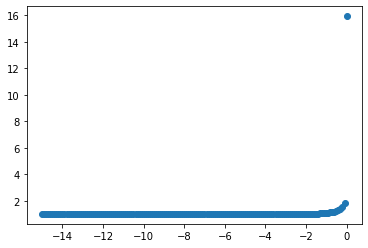

In [114]:
x=np.arange(-15,10,0.1)

plt.scatter(x,heavcdf(x,-1,1,1))

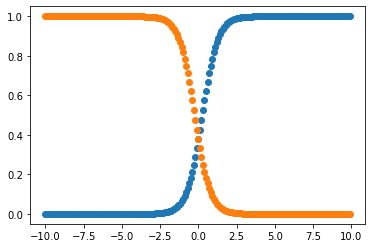

In [157]:
def heavpdf(x, a,b):
    return (1/(a + np.exp(-2*b*x+0.5)))

x=np.arange(-10,10,0.1)

alist=[1,1]
blist=[1,-1]
for a,b in zip(alist,blist):
    plt.scatter(x,heavpdf(x,a,b))
    
plt.show()

In [162]:
def heavcdf(x, a, b,c,d):
    return ((np.log(a*np.exp(2*b*x)+np.log(c))/(2*a*b))+d)

def heavpdf(x, a,b,c):
    return (1/(a + np.exp(-2*b*x+c)))


[ 0.50119766 -9.39151827  1.00000003 -0.89327525]


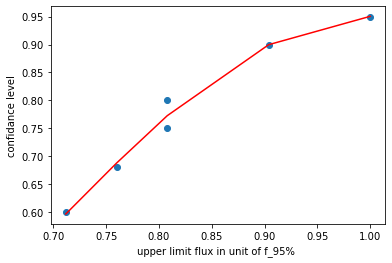

cdf for 1th flux is: 0.02 which should be 0.68


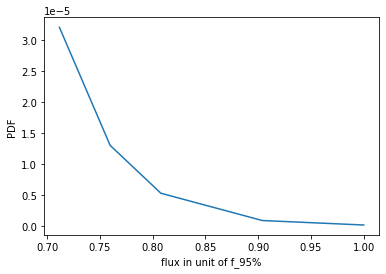

[ 0.65359738 -9.98222666  1.00000002 -0.40745583]


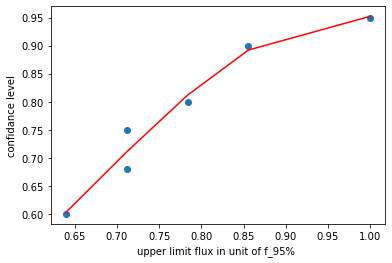

cdf for 2th flux is: 0.02 which should be 0.75


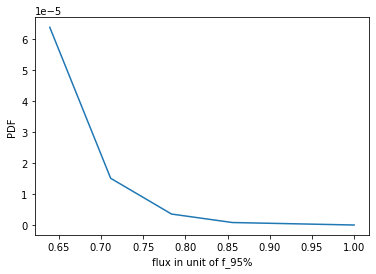

[ 1.18806674 -2.39078766  1.01719323  0.3126819 ]


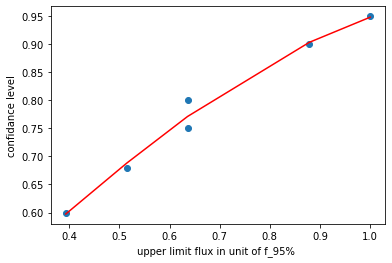

cdf for 3th flux is: 0.06 which should be 0.8


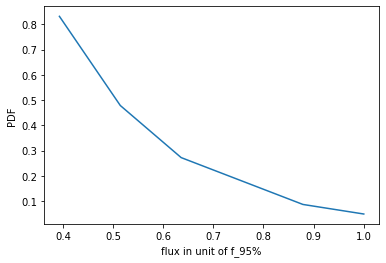

In [179]:
fitIndex=[0,1,2] #good fit index
i=0
parmlist=[]
for index in fitIndex:
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(heavcdf, x, y,bounds=([0,-np.inf,0,-np.inf],[np.inf,0,np.inf,np.inf]))
    parmlist.append(param)
    print(param)
    y2 = heavcdf(x,*param)
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95% ") #(cts/s/cm^2)
    plt.show()
    print("cdf for {}th flux is: {} which should be {}".format(i,round(quad(heavpdf, 0, x[i], args=(param[0],param[1],param[2]))[0],2),y[i]))
    
    normfac=quad(heavpdf, 0, 1, args=(param[0],param[1],param[2]))[0]
    plt.plot(x,heavpdf(np.array(x),param[0],param[1],param[2])/normfac)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()


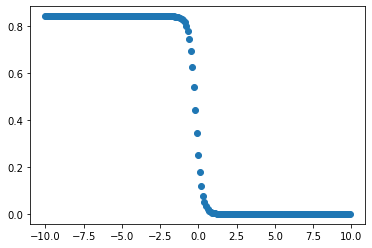

In [176]:
x=np.arange(-10,10,0.1)
plt.scatter(x,heavpdf(x,param[0],param[1],param[2]))

[ 1765.51434036 -9401.71500086]
cdf for 1th flux is: -0.0 which should be 0.68


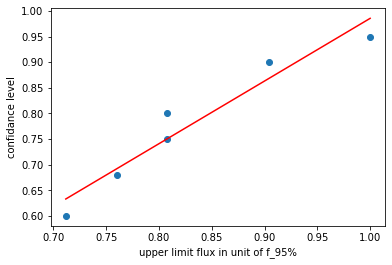

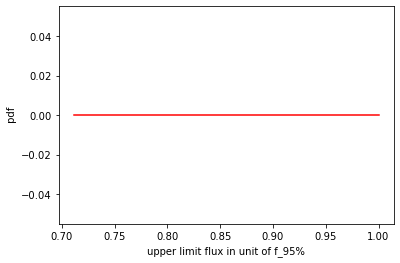

[ 1953.8072054  -6702.80920362]
cdf for 2th flux is: -0.0 which should be 0.75


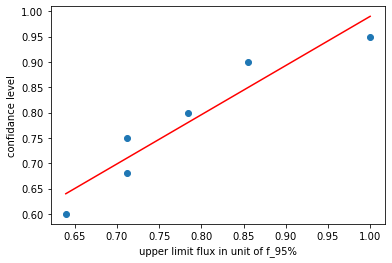

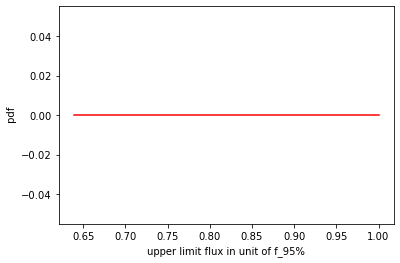

[ 1812.79596533 -9757.18080991]
cdf for 3th flux is: -0.0 which should be 0.8


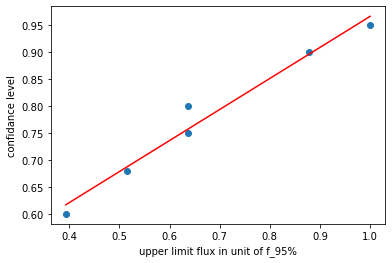

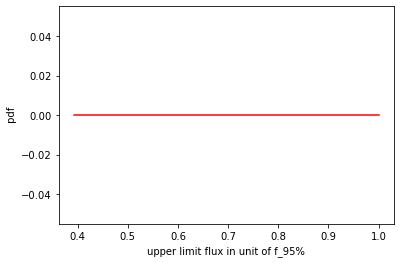

[ 1896.79512317 -6656.65590466]
cdf for 4th flux is: -0.0 which should be 0.9


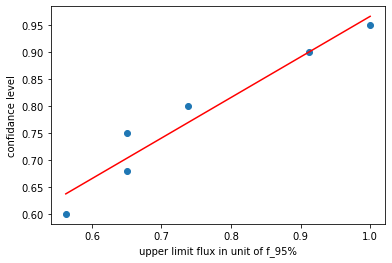

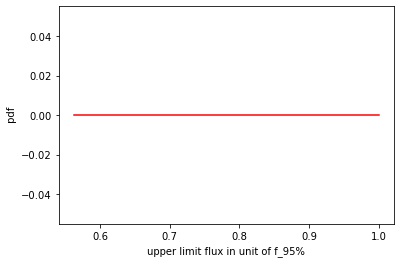

[ 1905.44005679 -9572.41501959]
cdf for 5th flux is: -0.0 which should be 0.95


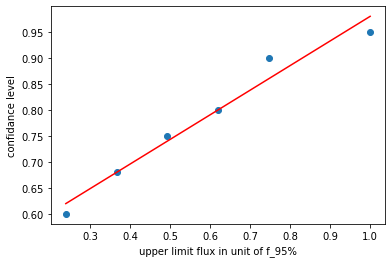

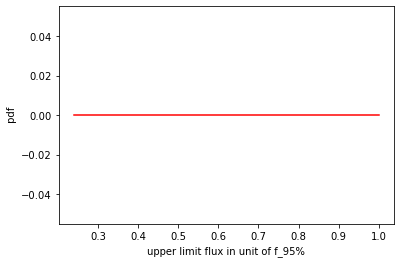

In [112]:
i=0
for index in [0,1,2,5,6]:
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(heavcdf, x, y)
    param2,param_cov2= leastsq(func=residuals, x0=(1,1), args=(x, y))
    #y2 = heavcdf(x, *param)
    y2_n=heavpdf(x, *param2)
    print(param2)
    print("cdf for {}th flux is: {} which should be {}".format(i,round(quad(heavpdf, 0, x[i], args=(param2[0],param2[1]))[0],5),y[i]))
    
    #plt.scatter(x,y)
    #plt.plot(x,y2,c="r")
    #plt.ylabel("confidance level")
    #plt.xlabel("upper limit flux in unit of f_95%")
    #plt.show()
    
    plt.plot(x,y2_n,c="r")
    plt.ylabel(" pdf")
    plt.xlabel("upper limit flux in unit of f_95%")
    plt.show()


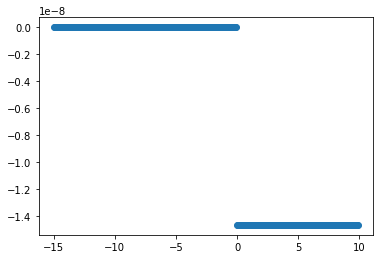

In [109]:
x=np.arange(-15,10,0.1)

plt.scatter(x,heavpdf(x, *param2))

[ 0.81835213 12.86399988 -0.22691497]


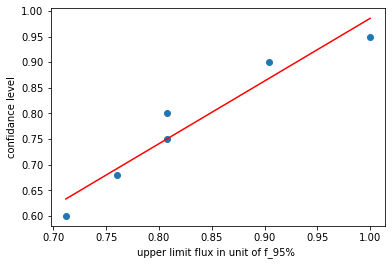

cdf for 1th flux is: 0.89 which should be 0.68


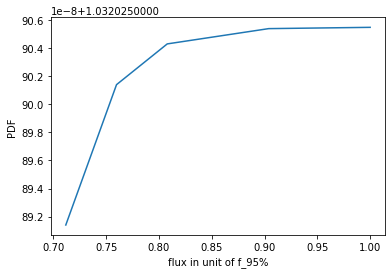

[1.03032920e+00 2.16162547e+01 1.87660671e-02]


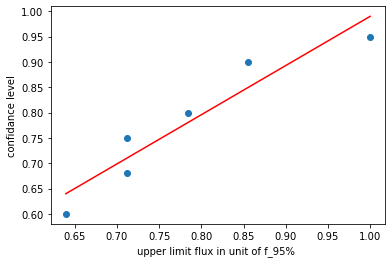

cdf for 2th flux is: 0.68 which should be 0.75


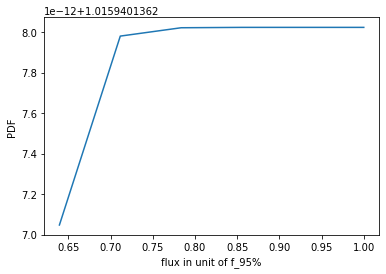

[ 1.73907744 21.21807705  0.38363845]


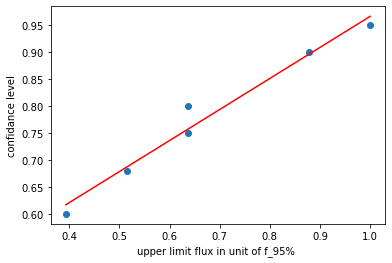

cdf for 3th flux is: 0.36 which should be 0.8


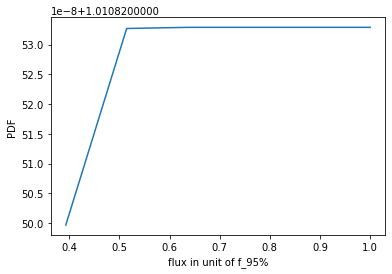

[ 2.11306951 91.91385738  0.50482883]


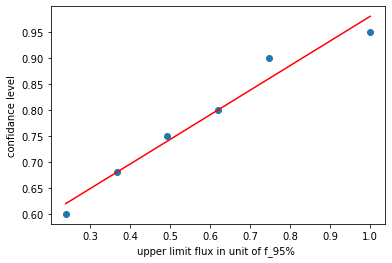

cdf for 4th flux is: 0.35 which should be 0.9


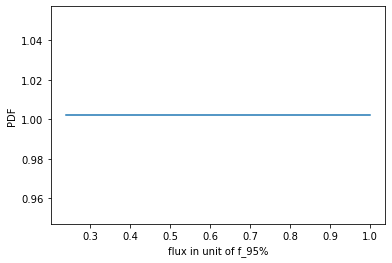

In [139]:
fitIndex=[0,1,2,6] #good fit index
i=0
parmlist=[]
for index in fitIndex:
    i+=1
    x=df.loc[index].values[1:]*pow(10,-7)
    x/=x[-1]
    param, param_cov = curve_fit(heavcdf, x, y)
    parmlist.append(param)
    print(param)
    y2 = heavcdf(x,param[0],param[1],param[2])
    plt.scatter(x,y)
    plt.plot(x,y2,c="r")
    plt.ylabel("confidance level")
    plt.xlabel("upper limit flux in unit of f_95% ") #(cts/s/cm^2)
    plt.show()
    print("cdf for {}th flux is: {} which should be {}".format(i,round(quad(heavpdf, 0, x[i], args=(param[0],param[1]))[0],2),y[i]))
    
    normfac=quad(heavpdf, 0, 1, args=(param[0],param[1]))[0]
    plt.plot(x,heavpdf(np.array(x),param[0],param[1])/normfac)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylabel("PDF")
    plt.xlabel("flux in unit of f_95%")
    plt.show()


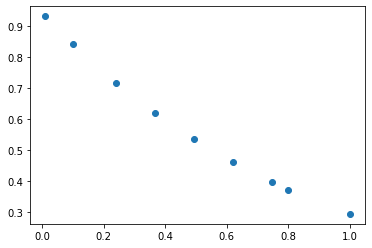

In [149]:
x1=[0.01,0.1,0.8]
xnew=np.array(x1+list(x))
plt.scatter(xnew,heavpdf(np.array(xnew),param[0],param[1]))

In [40]:
quad(heavpdf, 0, 1, args=(param[0],param[1]))[0]/0.47

1.0047823502320345

we cannot generalize all different rows of data (different sources) with one model. So we need to change our method.